In [367]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
from mpl_toolkits.basemap import Basemap
sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio



In [368]:
dx=36000
t = 60*60*24*360 #seconds in an year

In [369]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results18km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth_18km = file2read.variables['Depth']
Depth_18km = Depth_18km[:]*1
bathy_18km = file2read.variables['HFacC']
bathy_18km = bathy_18km[:]*1
Zp1_18km = file2read.variables['Zp1']
Zp1_18km = Zp1_18km[:]*1

XC_18km = file2read.variables['XC']
XC_18km = XC_18km[:]*1
YC_18km = file2read.variables['YC']
YC_18km = YC_18km[:]*1

bathy_18km[bathy_18km==0]=-1
bathy_18km[bathy_18km>0]=0
bathy_18km[bathy_18km==-1]=1

bathy1_18km = bathy_18km[0,:,:]

In [370]:
x="/scratch/general/am8e13/results2_multitrac18km//"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_18km=file2read.variables['S']
S_18km=S_18km[:]*1
V_18km=file2read.variables['V']
V_18km=V_18km[:]*1
T_18km=file2read.variables['Temp']
T_18km=T_18km[:]*1

Y_18km=file2read.variables['Y']
Y_18km=Y_18km[:]*1
Z_18km=file2read.variables['Z']
Z_18km=Z_18km[:]*1
X_18km=file2read.variables['X']
X_18km=X_18km[:]*1
I_18km=file2read.variables['iter']
I_18km=I_18km[:]*1
days_18km=file2read.variables['T']
days_18km=days_18km[:]*1


In [371]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth_36km = file2read.variables['Depth']
Depth_36km = Depth_36km[:]*1
bathy_36km = file2read.variables['HFacC']
bathy_36km = bathy_36km[:]*1
Zp1_36km = file2read.variables['Zp1']
Zp1_36km = Zp1_36km[:]*1

XC_36km = file2read.variables['XC']
XC_36km = XC_36km[:]*1
YC_36km = file2read.variables['YC']
YC_36km = YC_36km[:]*1

bathy_36km[bathy_36km==0]=-1
bathy_36km[bathy_36km>0]=0
bathy_36km[bathy_36km==-1]=1

bathy1_36km = bathy_36km[0,:,:]

In [372]:
x="/scratch/general/am8e13/results2_multitrac36km//"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_36km=file2read.variables['S']
S_36km=S_36km[:]*1
V_36km=file2read.variables['V']
V_36km=V_36km[:]*1
T_36km=file2read.variables['Temp']
T_36km=T_36km[:]*1

U=file2read.variables['U']
U=U[:]*1
V=file2read.variables['V']
V=V[:]*1

Y_36km=file2read.variables['Y']
Y_36km=Y_36km[:]*1
Z_36km=file2read.variables['Z']
Z_36km=Z_36km[:]*1
X_36km=file2read.variables['X']
X_36km=X_36km[:]*1
I_36km=file2read.variables['iter']
I_36km=I_36km[:]*1
days_36km=file2read.variables['T']
days_36km=days_36km[:]*1

In [373]:
x="/scratch/general/am8e13/results2_blownupfull/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
Y=file2read.variables['Y']
Y=Y[:]*1
S_pert=file2read.variables['S']
S_pert=S_pert[:]*1
U_pert=file2read.variables['U']
U_pert=U_pert[:]*1
V_pert=file2read.variables['V']
V_pert=V_pert[:]*1
ETA_pert = file2read.variables['Eta']
ETA_pert = ETA_pert[:]*1
Temp_pert = file2read.variables['Temp']
Temp_pert = Temp_pert[:]*1

In [374]:
x="/scratch/general/am8e13/noaa_climatology/"
os.chdir(x)
file2read = netcdf.NetCDFFile("s00_04.nc",'r')
s_oa=file2read.variables['s_oa']
s_oa=s_oa[:]*1
s_mn=file2read.variables['s_mn']
s_mn=s_mn[:]*1
s_an=file2read.variables['s_an']
s_an=s_an[:]*1
file2read = netcdf.NetCDFFile("t00_04.nc",'r')
t_oa=file2read.variables['t_oa']
t_oa=t_oa[:]*1
t_mn=file2read.variables['t_mn']
t_mn=t_mn[:]*1
t_an=file2read.variables['t_an']
t_an=t_an[:]*1
lon=file2read.variables['lon']
lon=lon[:]*1
lat=file2read.variables['lat']
lat=lat[:]*1
depth=file2read.variables['depth']
depth=depth[:]*1

In [375]:
# Arctic Transects
S_ave_18km = np.mean(S_18km,axis=0)
T_ave_18km = np.mean(T_18km,axis=0)
S_ave_36km = np.mean(S_36km,axis=0)
T_ave_36km = np.mean(T_36km,axis=0)

# For plotting purpose we set NaN on the land

S_ave_18km[bathy_18km == 1] = np.nan
T_ave_18km[bathy_18km == 1] = np.nan
S_ave_36km[bathy_36km == 1] = np.nan
T_ave_36km[bathy_36km == 1] = np.nan


In [404]:
#!/bin/python


"""Komod plot module 
Contain mostly set of wrapper functions for map plotting with Basemap.
Can be used with any 2D data, not necessarily MITgcm."""

import numpy as np
from mpl_toolkits.basemap import Basemap

def regbase(region):
	'''Takes name of the region and returns dictionary with
	information necessary for creation of the Basemap instance
    '''

	mapDict = {}

	if region == 'Arctic':
		mapDict['projection'] = 'npstere'
		mapDict['boundinglat'] = 60
		mapDict['lon_0'] = 0
		mapDict['resolution'] = 'l'

	return mapDict

def bp(lon, lat, data, region = 'Arctic', ptype = 'contourf',**kwargs):
    
    '''Basic Basemap plot function. Use coordinates (1d or 2d), data and name of the region
     as an input and plot data. Region defines in the "regbase" function.

     You can also provide any argument for matplotlib plotting functions.

     Usage:
         bp(lon, lat, data, region = 'Arctic', ptype = 'contourf', **kwargs)
     
     Input:
        lon 		- 2D or 1D array of longitudes
		lat 		- 2D or 1D array of latitudes
		data 		- 2D array of scalar data.
		region      - one of the predefined regions (for list of regions see the "regbase" function)
		ptype       - plot type (contour, contourf, pcolor, pcolormesh)
		**kwargs    - arguments for plotting functions

     Output:
        Basemap instance.
    '''
    
    mapDict = regbase(region)

    # Create Basemap instance
    if mapDict['projection'] == 'npstere':
    	m = Basemap(projection=mapDict['projection'],boundinglat=mapDict['boundinglat'],\
    		        lon_0=mapDict['lon_0'],resolution=mapDict['resolution'])
    
    # Check if we have proper number of dimensions for lon (and hopefully lat as well)
    if lon.shape.__len__() == 1:
    	lon, lat = np.meshgrid(lon, lat)
    elif lon.shape.__len__() > 2:
    	raise Exception("Coordinate variables (lon) has too many dimensions")
    
    # Convert lat/lon to map coordinates
    x, y = m(lon, lat)

    # Make the map look better
    m.fillcontinents(color='gray',lake_color='gray')
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    
    # Draw values on the map
    if ptype == 'contourf':
        cs = m.contourf(x,y,data,**kwargs)
        cbar3 = plt.colorbar(cs)
    elif ptype == 'pcolormesh':
        cs = m.pcolormesh(x,y,data,**kwargs)
    elif ptype == 'contour':
        cs = m.contour(x,y,data,**kwargs)
    elif ptype == 'pcolor':
        cs = m.pcolor(x,y,data,**kwargs)
    else:
        raise Exception("Plot type not supported. Valid plot types are: contour, contourf, pcolor, pcolormesh ")
    
    return m

In [377]:
# The function mpl_toolkits.basemap.interp allows to interpolate between different grids

import  mpl_toolkits.basemap 
t_interp = np.zeros((102, 192, 210))
s_interp = np.zeros((102, 192, 210))
# looping in the vertical coordinate
for k in range(0,102):
    t_interp[k,:,:] = mpl_toolkits.basemap.interp(t_an[0,k,:,:], lon, lat,XC_36km, YC_36km, checkbounds=False, masked=False, order=1)
    s_interp[k,:,:] = mpl_toolkits.basemap.interp(s_an[0,k,:,:], lon, lat,XC_36km, YC_36km, checkbounds=False, masked=False, order=1)
    

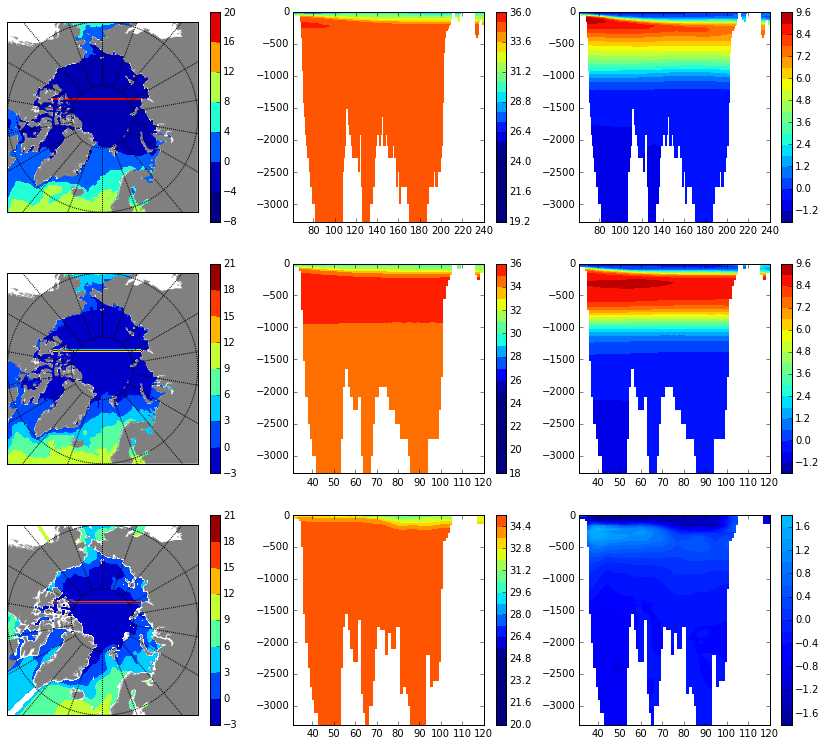

In [408]:
# Arctic Transects

fig, ((ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(3,3)

T_ave_36km_temp = np.array(T_ave_36km)
T_ave_36km_temp[0,30:120,125:126] = 20
T_ave_18km_temp = np.array(T_ave_18km)
T_ave_18km_temp[0,30*2:120*2,125*2:126*2] = 20


ax1 = plt.subplot(3,3,1)
im1 = bp(XC_36km, YC_36km, T_ave_36km_temp[0,:,:],vmin=-3,vmax=20)
#ax1.contourf(X_18km,Y_18km,bathy_2_18km,10)
simin = 25
simax = 37
timin = -2
timax = 10

ax2 = plt.subplot(3,3,2)
im2 = ax2.contourf(Y_18km[30*2:120*2],Z_18km[0:43],S_ave_18km[0:43,30*2:120*2,125*2],20,vmin=simin, vmax=simax)
cbar2 = plt.colorbar(im2)

ax3 = plt.subplot(3,3,3)
im3 = ax3.contourf(Y_18km[30*2:120*2],Z_18km[0:43],T_ave_18km[0:43,30*2:120*2,125*2],20,vmin=timin, vmax=timax)
cbar3 = plt.colorbar(im3)

ax4 = plt.subplot(3,3,4)
im4 = bp(XC_18km, YC_18km, T_ave_18km_temp[0,:,:],vmin=-3,vmax=20)

ax5 = plt.subplot(3,3,5)
im5 = ax5.contourf(Y_36km[30:120],Z_36km[0:43],S_ave_36km[0:43,30:120,125],20,vmin=simin, vmax=simax)
#im5 = plt.clim((np.nanmin(S_ave_18km[0:43,72*2,:])),np.nanmax(S_ave_18km[0:43,72*2,:]))
cbar5 = plt.colorbar(im5)

ax6 = plt.subplot(3,3,6)
im6 = ax6.contourf(Y_36km[30:120],Z_36km[0:43],T_ave_36km[0:43,30:120,125],20,vmin=timin, vmax=timax)
cbar6 = plt.colorbar(im6)

s_new_2 = np.array(s_interp)
t_new_2 = np.array(t_interp)

t_new_1 = np.array(t_interp)
t_new_1[t_new_1 > 100] = np.nan
t_new_1[0,30:120,125:126]=20

s_new_2[s_new_2 > 100] = np.nan
t_new_2[t_new_2 > 100] = np.nan

ax7 = plt.subplot(3,3,7)
im7 = bp(XC_36km, YC_36km, t_new_1[0,:,:],vmin=-3,vmax=20)

ax8 = plt.subplot(3,3,8)
im8 = ax8.contourf(Y_36km[30:120],-depth[0:80],s_new_2[0:80,30:120,125],20,vmin=simin, vmax=simax)
#im8 = plt.clim((np.nanmin(S_ave_18km[0:43,72*2,:])),np.nanmax(S_ave_18km[0:43,72*2,:]))
cbar8 = plt.colorbar(im8)

ax9 = plt.subplot(3,3,9)
im9 = ax9.contourf(Y_36km[30:120],-depth[0:80],t_new_2[0:80,30:120,125],20,vmin=timin, vmax=timax)
cbar9 = plt.colorbar(im9)

fig.subplots_adjust(right=2,top=2.6)

In [432]:
def arctic_plot(x1,x2,y1,y2):
    fig, ((ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(3,3)
    
    if x1 == x2:
        axis_18 = np.array(-Y_18km[y1*2:y2*2])
        axis_36 = np.array(-Y_36km[y1:y2])
        s_temp_18 = np.array(S_ave_18km[:,y1*2:y2*2,x1*2])
        s_temp_36 = np.array(S_ave_36km[:,y1:y2,x1])
        t_temp_18 = np.array(T_ave_18km[:,y1*2:y2*2,x1*2])
        t_temp_36 = np.array(T_ave_36km[:,y1:y2,x1])
        s_new_2 = np.array(s_interp[:,y1:y2,x1])
        t_new_2 = np.array(t_interp[:,y1:y2,x1])
    elif y1 == y2:
        axis_18 = np.array(X_18km[x1*2:x2*2])
        axis_36 = np.array(X_36km[x1:x2])
        s_temp_18 = np.array(S_ave_18km[:,y1*2,x1*2:x2*2])
        s_temp_36 = np.array(S_ave_36km[:,y1,x1:x2])
        t_temp_18 = np.array(T_ave_18km[:,y1*2,x1*2:x2*2])
        t_temp_36 = np.array(T_ave_36km[:,y1,x1:x2])
        s_new_2 = np.array(s_interp[:,y1,x1:x2])
        t_new_2 = np.array(t_interp[:,y1,x1:x2])
    else:
        print "Error: wrong coordinates"
        return
    
    simin = 32
    simax = 37
    timin = -2
    timax = 10
    
    T_ave_36km_temp = np.array(T_ave_36km[0,:,:])
    T_ave_36km_temp[y1:y2+1,x1:x2+1] = 20
    T_ave_18km_temp = np.array(T_ave_18km[0,:,:])
    T_ave_18km_temp[y1*2:y2*2+1,x1*2:x2*2+1] = 20
    
    ax1 = plt.subplot(3,3,1)
    im1 = bp(XC_18km, YC_18km, T_ave_18km_temp,vmin=-3,vmax=20)
    
    ax2 = plt.subplot(3,3,2)
    im2 = ax2.contourf(axis_18,Z_18km,s_temp_18,20,vmin=simin, vmax=simax)
    cbar2 = plt.colorbar(im2)
    
    ax3 = plt.subplot(3,3,3)
    im3 = ax3.contourf(axis_18,Z_18km,t_temp_18,20,vmin=timin, vmax=timax)
    cbar3 = plt.colorbar(im3)
    
    ax4 = plt.subplot(3,3,4)
    im4 = bp(XC_36km, YC_36km, T_ave_36km_temp,vmin=-3,vmax=20)
    
    ax5 = plt.subplot(3,3,5)
    im5 = ax5.contourf(axis_36,Z_36km,s_temp_36,20,vmin=simin, vmax=simax)
    cbar5 = plt.colorbar(im5)
    
    ax6 = plt.subplot(3,3,6)
    im6 = ax6.contourf(axis_36,Z_36km,t_temp_36,20,vmin=timin, vmax=timax)
    cbar6 = plt.colorbar(im6)
    
    t_new_1 = np.array(t_interp[0,:,:])
    t_new_1[t_new_1 > 100] = np.nan
    t_new_1[y1:y2+1,x1:x2+1]=20
    
    s_new_2[s_new_2 > 100] = np.nan
    t_new_2[t_new_2 > 100] = np.nan
    
    ax7 = plt.subplot(3,3,7)
    im7 = bp(XC_36km, YC_36km, t_new_1,vmin=-3,vmax=20)
    
    ax8 = plt.subplot(3,3,8)
    im8 = ax8.contourf(axis_36,-depth,s_new_2,20,vmin=simin, vmax=simax)
    cbar8 = plt.colorbar(im8)
    
    ax9 = plt.subplot(3,3,9)
    im9 = ax9.contourf(axis_36,-depth,t_new_2,20,vmin=timin, vmax=timax)
    cbar9 = plt.colorbar(im9)
    fig.subplots_adjust(right=2,top=2.6)
    
    return

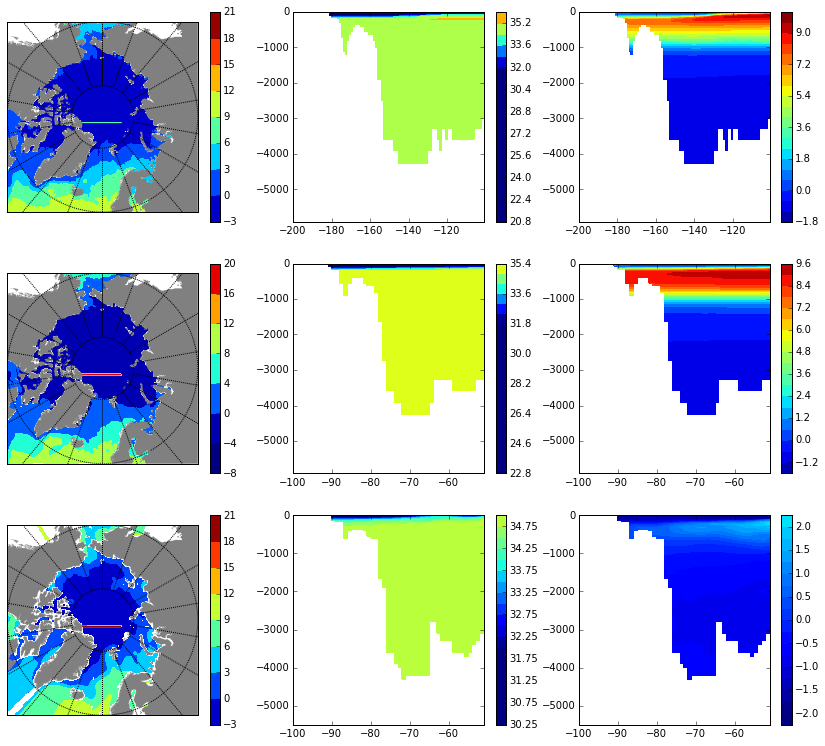

In [433]:
arctic_plot(100,100,50,100)

NameError: name 't_2_18km' is not defined

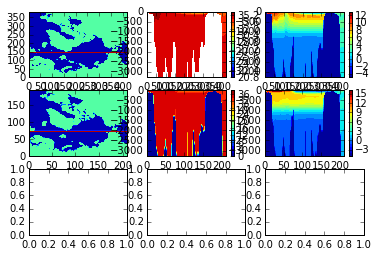

In [379]:
# Arctic Transects
bathy_2_18km = np.array(bathy_18km[0,:,:])
bathy_2_18km[72*2:73*2,:]=2
bathy_2_36km = np.array(bathy_36km[0,:,:])
bathy_2_36km[72:73,:]=2

bathy_3_18km = np.array(bathy_18km[:,:,:])
bathy_3_36km = np.array(bathy_36km[:,:,:])

fig, ((ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(3,3)

ax1 = plt.subplot(3,3,1)
ax1.contourf(X_18km,Y_18km,bathy_2_18km,10)

ax2 = plt.subplot(3,3,2)
im2 = ax2.contourf(X_18km,Z_18km[0:43],S_ave_18km[0:43,72*2,:]+bathy_3_18km[0:43,72*2,:],20)
plt.clim((np.nanmin(S_ave_18km[0:43,72*2,:])),np.nanmax(S_ave_18km[0:43,72*2,:]))
cbar2 = plt.colorbar(im2)

ax3 = plt.subplot(3,3,3)
im3 = ax3.contourf(X_18km,Z_18km[0:43],T_ave_18km[0:43,72*2,:]+bathy_3_18km[0:43,72*2,:]*(-5),20)
cbar3 = plt.colorbar(im3)

ax4 = plt.subplot(3,3,4)
ax4.contourf(X_36km,Y_36km,bathy_2_36km,10)

ax5 = plt.subplot(3,3,5)
im5 = ax5.contourf(X_36km,Z_36km[0:43],S_ave_36km[0:43,72,:]+bathy_3_36km[0:43,72,:],20)
plt.clim((np.nanmin(S_ave_18km[0:43,72*2,:])),np.nanmax(S_ave_18km[0:43,72*2,:]))
cbar5 = plt.colorbar(im5)

ax6 = plt.subplot(3,3,6)
im6 = ax6.contourf(X_36km,Z_36km[0:43],T_ave_36km[0:43,72,:]+bathy_3_36km[0:43,72,:]*(-5),20)
cbar6 = plt.colorbar(im6)

s_new_1 = np.array(s_an)
t_new_1 = np.array(t_an)
s_new_1[s_new_1 == 9.96921e+36] = 50
s_new_1[:,:,0:123,700:701]=50
t_new_1[t_new_1 == 9.96921e+36] =-5

s_new_2 = np.array(s_an)
t_new_2 = np.array(t_an)
s_new_2[s_new_2 == 9.96921e+36] =20
t_new_2[t_new_2 == 9.96921e+36] =-5

ax7 = plt.subplot(3,3,7)
#im7 = bp(lon, lat, s_new_1[0,0,:,:])#ax7.contourf(s_new_1[0,1,:,:])
ax7.contourf(X_18km,Y_18km,t_2_18km,10)


ax8 = plt.subplot(3,3,8)
im8 = ax8.contourf(lat[0:123],-depth[0:80],s_new_2[0,0:80,0:123,700],20)
cbar8 = plt.colorbar(im8)

ax9 = plt.subplot(3,3,9)
im9 = ax9.contourf(lat[0:123],-depth[0:80],t_new_2[0,0:80,0:123,700],20)
cbar9 = plt.colorbar(im9)

fig.subplots_adjust(right=2,top=2.6)

In [ ]:
# Arctic Transects
bathy_2_18km = np.array(bathy_18km[0,:,:])
bathy_2_18km[60*2:77*2,76*2:77*2]=2
bathy_2_36km = np.array(bathy_36km[0,:,:])
bathy_2_36km[60:77,76:77]=2

bathy_3_18km = np.array(bathy_18km[:,:,:])
bathy_3_36km = np.array(bathy_36km[:,:,:])

fig, ((ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(3,3)

ax1 = plt.subplot(3,3,1)
ax1.contourf(X_18km,Y_18km,bathy_2_18km,10)

ax2 = plt.subplot(3,3,2)
im2 = ax2.contourf(-Y_18km[60*2:77*2],Z_18km[0:43],S_ave_18km[0:43,60*2:77*2,77*2]+bathy_3_18km[0:43,60*2:77*2,77*2],20)
cbar2 = plt.colorbar(im2)

ax3 = plt.subplot(3,3,3)
im3 = ax3.contourf(-Y_18km[60*2:77*2],Z_18km[0:43],T_ave_18km[0:43,60*2:77*2,77*2]+bathy_3_18km[0:43,60*2:77*2,77*2]*(-5),20)
cbar3 = plt.colorbar(im3)

ax4 = plt.subplot(3,3,4)
ax4.contourf(X_36km,Y_36km,bathy_2_36km,10)

ax5 = plt.subplot(3,3,5)
im5 = ax5.contourf(-Y_36km[60:77],Z_36km[0:43],S_ave_36km[0:43,60:77,77]+bathy_3_36km[0:43,60:77,77],20)
cbar5 = plt.colorbar(im5)

ax6 = plt.subplot(3,3,6)
im6 = ax6.contourf(-Y_36km[60:77],Z_36km[0:43],T_ave_36km[0:43,60:77,77]+bathy_3_36km[0:43,60:77,77]*(-5),20)
cbar6 = plt.colorbar(im6)

s_new_1 = np.array(s_an)
t_new_1 = np.array(t_an)
s_new_1[s_new_1 == 9.96921e+36] = 50
s_new_1[:,:,80,650:780]=50
t_new_1[t_new_1 == 9.96921e+36] =-5

s_new_2 = np.array(s_an)
t_new_2 = np.array(t_an)
s_new_2[s_new_2 == 9.96921e+36] =20
t_new_2[t_new_2 == 9.96921e+36] =-5

ax7 = plt.subplot(3,3,7)
im7 = bp(lon, lat, s_new_1[0,0,:,:]) #ax7.contourf(s_new_1[0,1,:,:],20)

ax8 = plt.subplot(3,3,8)
im8 = ax8.contourf(lon[650:780],-depth[0:80],s_new_2[0,0:80,80,650:780],20)
cbar8 = plt.colorbar(im8)

ax9 = plt.subplot(3,3,9)
im9 = ax9.contourf(lon[650:780],-depth[0:80],t_new_2[0,0:80,80,650:780],20)
cbar9 = plt.colorbar(im9)

fig.subplots_adjust(right=2,top=2.6)

In [ ]:
# Arctic Transects
bathy_2_18km = np.array(bathy_18km[0,:,:])
bathy_2_18km[52*2:53*2,50*2:71*2]=2
bathy_2_36km = np.array(bathy_36km[0,:,:])
bathy_2_36km[52:53,50:71]=2

bathy_3_18km = np.array(bathy_18km[:,:,:])
bathy_3_36km = np.array(bathy_36km[:,:,:])

fig, ((ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(3,3)

ax1 = plt.subplot(3,3,1)
ax1.contourf(X_18km,Y_18km,bathy_2_18km,10)

ax2 = plt.subplot(3,3,2)
im2 = ax2.contourf(X_18km[50*2:71*2],Z_18km[0:23],S_ave_18km[0:23,51*2,50*2:71*2]+bathy_3_18km[0:23,51*2,50*2:71*2],20)
cbar2 = plt.colorbar(im2)

ax3 = plt.subplot(3,3,3)
im3 = ax3.contourf(X_18km[50*2:71*2],Z_18km[0:23],T_ave_18km[0:23,51*2,50*2:71*2]+bathy_3_18km[0:23,51*2,50*2:71*2]*(-5),20)
cbar3 = plt.colorbar(im3)

ax4 = plt.subplot(3,3,4)
ax4.contourf(X_36km,Y_36km,bathy_2_36km,10)

ax5 = plt.subplot(3,3,5)
im5 = ax5.contourf(X_36km[50:71],Z_36km[0:23],S_ave_36km[0:23,51,50:71]+bathy_3_36km[0:23,51,50:71]*20,20)
cbar5 = plt.colorbar(im5)

ax6 = plt.subplot(3,3,6)
im6 = ax6.contourf(X_36km[50:71],Z_36km[0:23],T_ave_36km[0:23,51,50:71]+bathy_3_36km[0:23,51,50:71]*(-5),20)
cbar6 = plt.colorbar(im6)

s_new_1 = np.array(s_an)
t_new_1 = np.array(t_an)
s_new_1[s_new_1 == 9.96921e+36] = 50
s_new_1[:,:,40:80,793:794]=50
t_new_1[t_new_1 == 9.96921e+36] =-5

s_new_2 = np.array(s_an)
t_new_2 = np.array(t_an)
s_new_2[s_new_2 == 9.96921e+36] =20
t_new_2[t_new_2 == 9.96921e+36] =-5

ax7 = plt.subplot(3,3,7)
im7 = bp(lon, lat, s_new_1[0,0,:,:])#ax7.contourf(s_new_1[0,1,:,:])

ax8 = plt.subplot(3,3,8)
im8 = ax8.contourf(lat[40:80],-depth[0:36],s_new_2[0,0:36,40:80,793],20)
cbar8 = plt.colorbar(im8)

ax9 = plt.subplot(3,3,9)
im9 = ax9.contourf(lat[40:80],-depth[0:36],t_new_2[0,0:36,40:80,793],20)
cbar9 = plt.colorbar(im9)

fig.subplots_adjust(right=2,top=2.6)

In [ ]:
display(Latex(r'The meridional overturning streamfunction, $\overline{\psi}$, is calculated as as follows:'))
display(Math(r'\overline{\psi} = \int_{x_e}^{x_w}\int_{-H}^{0} \overline{v}\, dzdx'))

In [ ]:
def mer_streamfunction(X,Y,Z,vel,dx):
    """ The function calculates the merdidional streamfunction
    Arguments taken are:
    X = X coordinates, Y = Y coordinates, Z Zp coordinates, dx the spatial resolution (36km or 18km) in meters
    vel = the velocity. This can be U, V, it can be temporally averaged or not, it can be partial on X or Y"""
    
    if np.shape(vel)>3:
        vel = np.mean(vel,axis = 0)
    if np.shape(vel)[-1]<len(X):
        coord = Y
        axisc = 2
    elif np.shape(vel)[-2]<len(Y):
        coord = X
        axisc = 1
    else:
        coord = X
        axisc = 1

    vel = vel[:len(Z),:len(Y),:len(X)]
    
    Vzone=np.nansum(vel*dx,axis = axisc)
    dz=Z[0:len(Z)-1]-Z[1:len(Z)]
    psi = np.zeros((len(Z),len(coord)))
    for j in range(len(coord)):
        for k in range(0,len(Z)-1):
            psi[k,j] = psi[k-1,j] + dz[k]*Vzone[k,j]
            
    Psi=psi/10**6 #Convert to Sv 
    Psi[Vzone==0]=np.nan
    fig = plt.figure(figsize=(10,7))
    fig = plt.contourf(coord,Zp[0:50],Psi[0:50,:] ,10,cmap=cm.seismic) #Use b2r colourmap
    plt.clim(-(np.nanmax(Psi)),np.nanmax(Psi))
    cbar = plt.colorbar()
    plt.title("MOC")
    plt.xlabel('Distance (km)')
    plt.ylabel('Depth (m)')
    cbar.ax.set_ylabel('Psi (sv)')
    return 

def baro_streamfunction(X,Y,Z,vel,dx): 
    """ The function calculates the barotropic streamfunction
    Arguments taken are:
    X = X coordinates, Y = Y coordinates, Z Zp coordinates, dx the spatial resolution (36km or 18km) in meters
    vel = the velocity. This can be U, V, it can be temporally averaged or not, it can be partial on X or Y"""
    
    if np.shape(vel)>3:
        vel = np.mean(vel,axis = 0)
    vel = vel[:len(Z),:len(Y),:len(X)]
    dz=Z[0:len(Z)-1]-Zp[1:len(Z)]
    Vzone = np.zeros((len(Y),len(X)))
    # Vertical integration
    for j in range(len(dz)-1):
        Vzone=Vzone + dz[j]*vel[j,:,:]
    psi = np.zeros((len(Y),len(X)))
    # Zonal integration        
    for j in reversed(range(len(X)-1)):
        for k in range(0,len(Y)):
            psi[k,j] = psi[k-1,j] + dx*Vzone[k,j]
            
    Psi=psi/10**6 #Convert to Sv 
    Psi[Vzone==0]=np.nan 
    fig = plt.figure(figsize=(10,7))
    fig = plt.contourf(X_36km,Y_36km,Psi ,10,cmap=cm.seismic) #Use b2r colourmap
    plt.clim(-(np.nanmax(Psi)),np.nanmax(Psi))
    cbar = plt.colorbar()
    plt.title("MOC")
    plt.xlabel('Distance (km)')
    plt.ylabel('Distance (km)')
    cbar.ax.set_ylabel('Psi (sv)')
    return 


In [ ]:
baro_streamfunction(X_36km,Y_36km,Z_36km,U_pert[10:20,:,:,:],dx)
baro_streamfunction(X_36km,Y_36km,Z_36km,V_pert[10:20,:,:,:],dx)

In [ ]:
whos